C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))



(1) finished after 1596 timesteps, total profit: -750.4428125779862, memery: 0


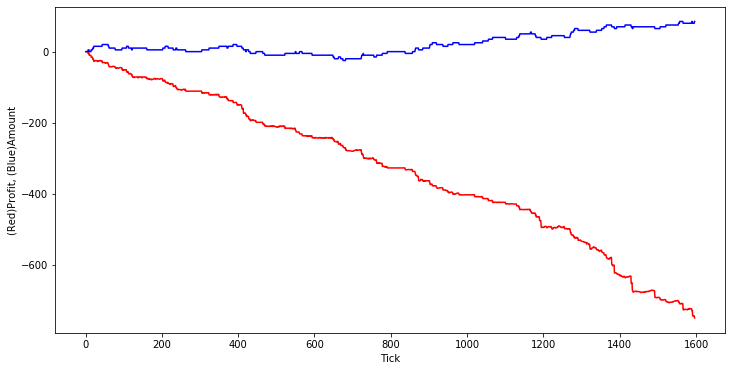

(2) finished after 1892 timesteps, total profit: -763.9314455587386, memery: 3


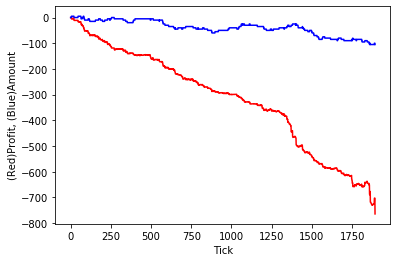

(3) finished after 1559 timesteps, total profit: -756.5163913230789, memery: 4


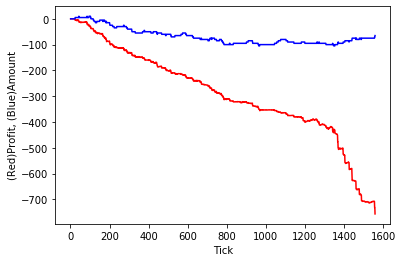

(4) finished after 7222 timesteps, total profit: -753.4046230710968, memery: 85


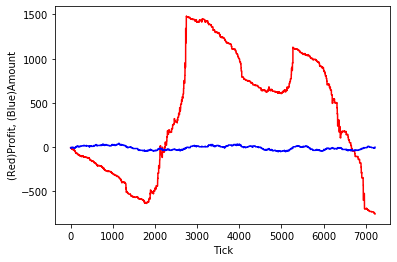

(5) finished after 1517 timesteps, total profit: -754.0451325285376, memery: 85


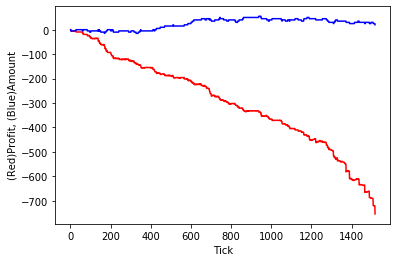

(6) finished after 1630 timesteps, total profit: -764.3665092192587, memery: 85


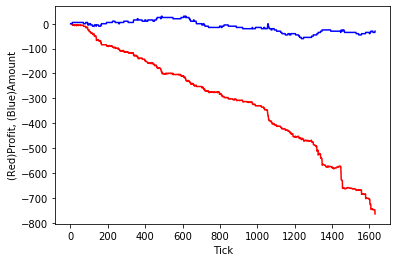

(7) finished after 14737 timesteps, total profit: -795.7430569980371, memery: 204


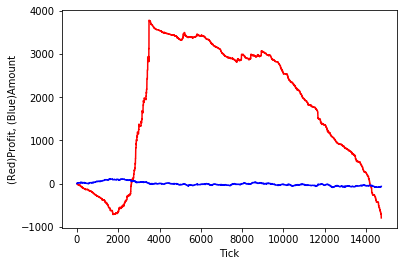

(8) finished after 1412 timesteps, total profit: -777.2836603467053, memery: 207


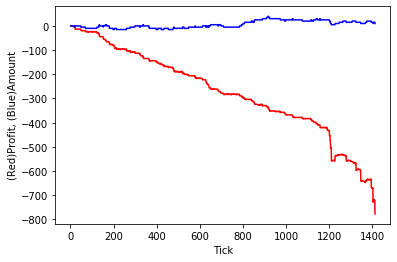

(9) finished after 1685 timesteps, total profit: -759.9055000013959, memery: 209


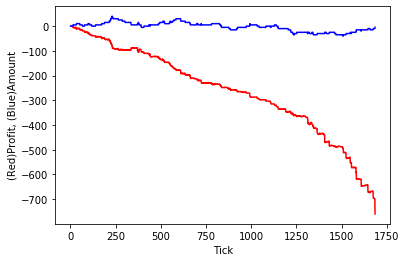

(10) finished after 1732 timesteps, total profit: -753.5741455230551, memery: 209


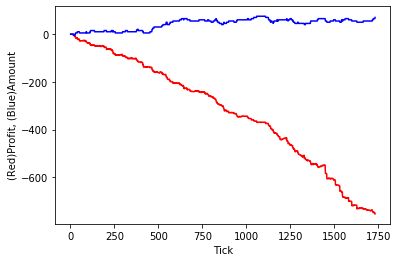

(11) finished after 4547 timesteps, total profit: -759.6461773422519, memery: 265


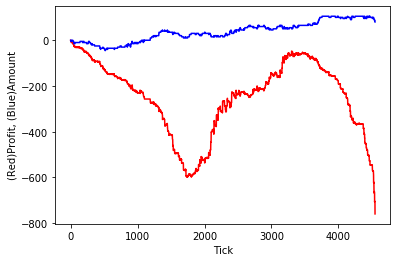

(12) finished after 1406 timesteps, total profit: -756.5858225898951, memery: 265


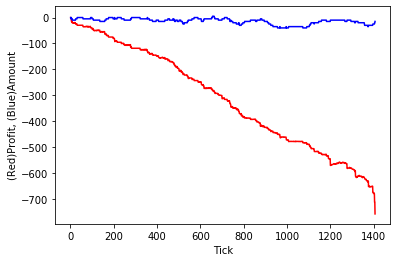

(13) finished after 2873 timesteps, total profit: -753.4896906940612, memery: 274


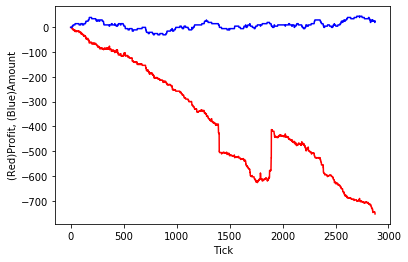

(14) finished after 3840 timesteps, total profit: -751.1592548267653, memery: 296


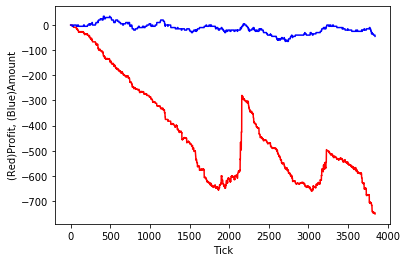

(15) finished after 1634 timesteps, total profit: -760.3029017703449, memery: 296


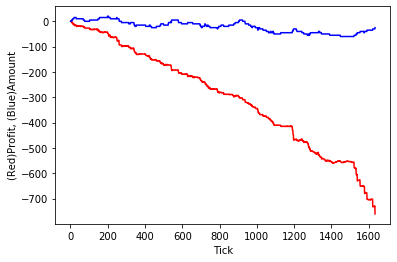

(16) finished after 1598 timesteps, total profit: -755.2202619720015, memery: 297


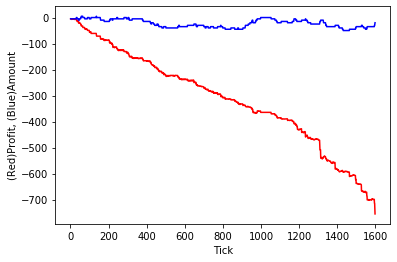

(17) finished after 1652 timesteps, total profit: -760.0047229390843, memery: 297


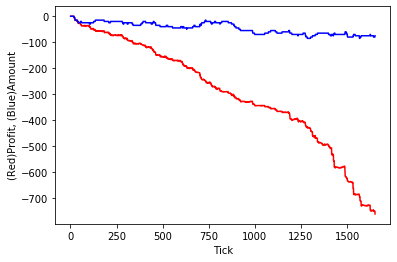

(18) finished after 34619 timesteps, total profit: -795.4592849354516, memery: 821


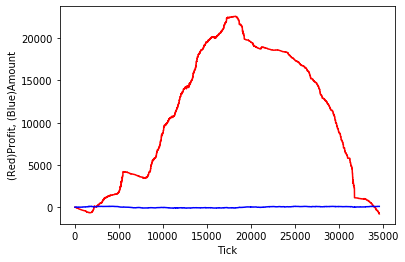

(19) finished after 1553 timesteps, total profit: -754.2231028083228, memery: 821


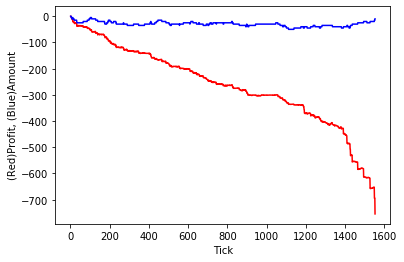

(20) finished after 4584 timesteps, total profit: -752.4989199630164, memery: 875


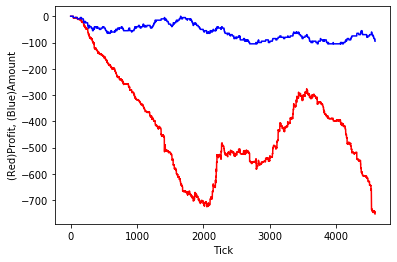

(21) finished after 1416 timesteps, total profit: -766.3465594260327, memery: 875


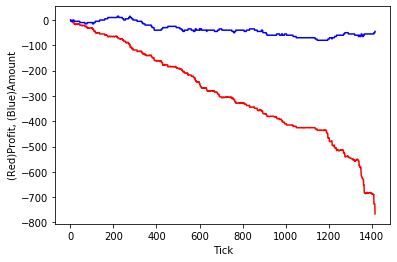

(22) finished after 1574 timesteps, total profit: -755.0771526586597, memery: 876


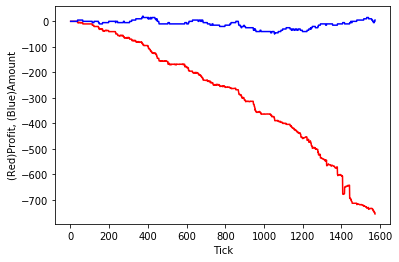

(23) finished after 1664 timesteps, total profit: -751.3091687100743, memery: 878


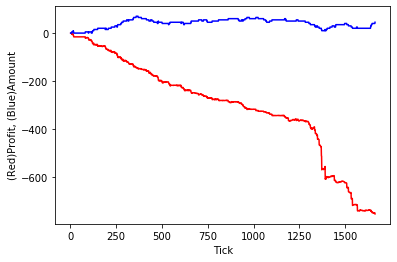

(24) finished after 1681 timesteps, total profit: -751.7150182669532, memery: 879


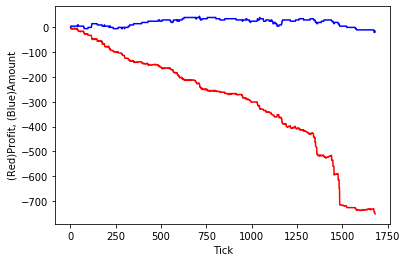

(25) finished after 7525 timesteps, total profit: -750.4671114998322, memery: 985


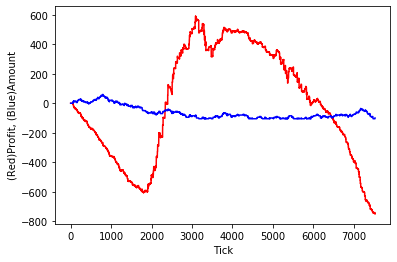

(26) finished after 1638 timesteps, total profit: -761.0276627198631, memery: 985


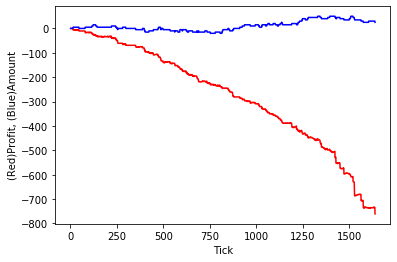

(27) finished after 1495 timesteps, total profit: -757.0259383722786, memery: 985


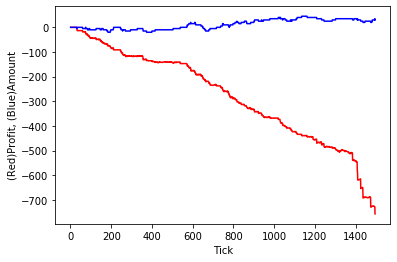

(28) finished after 1572 timesteps, total profit: -760.0223107714102, memery: 986


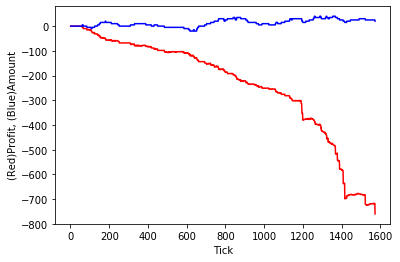

(29) finished after 1579 timesteps, total profit: -769.3895379824639, memery: 986


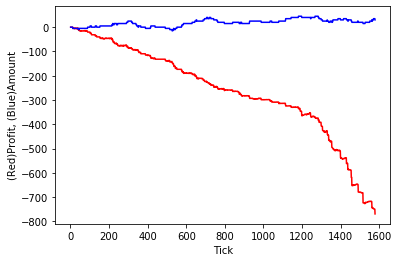

(30) finished after 1735 timesteps, total profit: -756.4185592638938, memery: 986


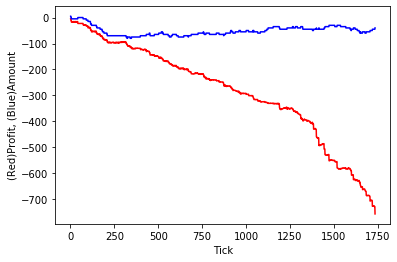

(31) finished after 2055 timesteps, total profit: -753.2890735674304, memery: 996


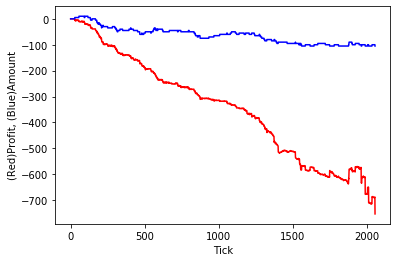

(32) finished after 1689 timesteps, total profit: -751.6020322075414, memery: 996


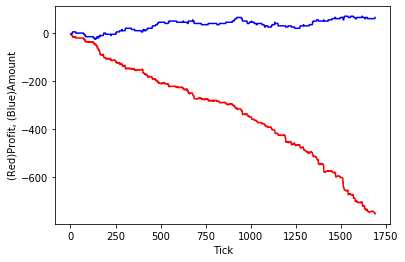

(33) finished after 1617 timesteps, total profit: -752.8070889303953, memery: 996


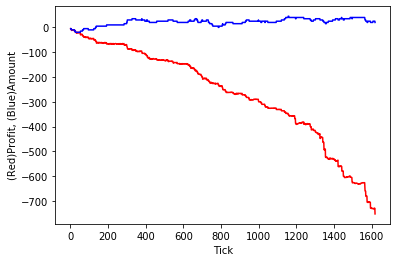

(34) finished after 1686 timesteps, total profit: -750.0471941356863, memery: 996


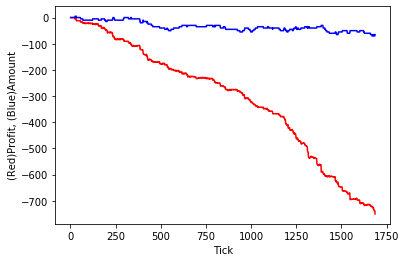

(35) finished after 1611 timesteps, total profit: -761.362941158229, memery: 996


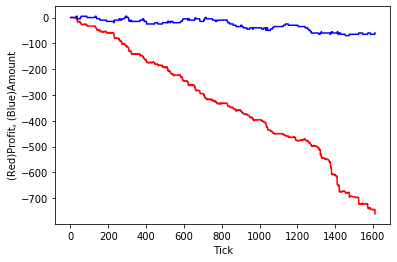

(36) finished after 1481 timesteps, total profit: -858.9954027804911, memery: 996


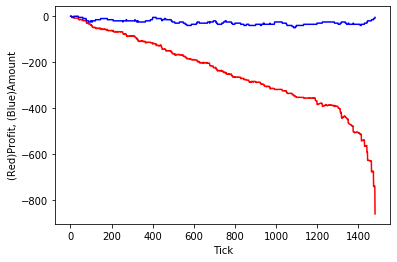

(37) finished after 1511 timesteps, total profit: -761.7255189388816, memery: 997


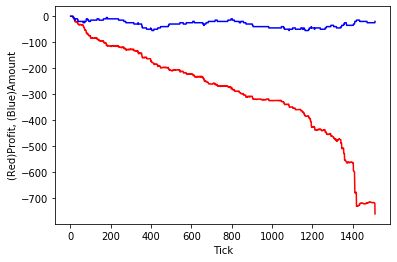

(38) finished after 1786 timesteps, total profit: -751.0806242673558, memery: 998


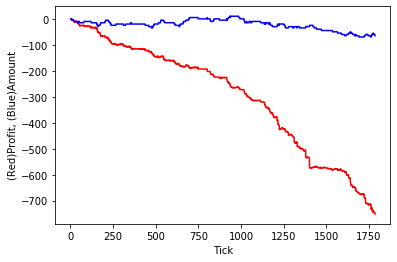

(39) finished after 1550 timesteps, total profit: -763.362413701878, memery: 1001


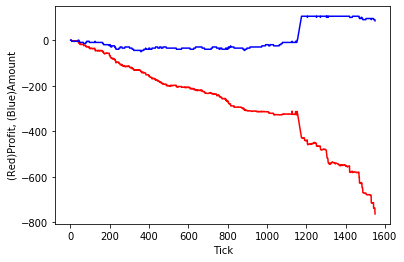

(40) finished after 1679 timesteps, total profit: -750.4393670229872, memery: 1001


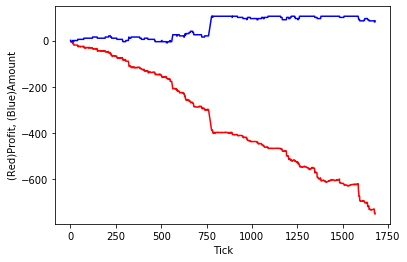

(41) finished after 1535 timesteps, total profit: -754.9924590383664, memery: 1001


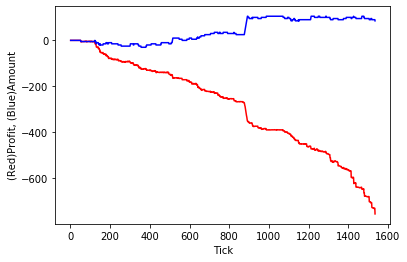

(42) finished after 1751 timesteps, total profit: -752.8201637342827, memery: 1003


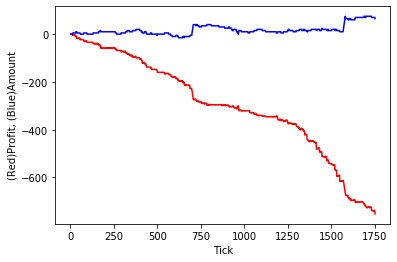

(43) finished after 1416 timesteps, total profit: -769.277728514994, memery: 1003


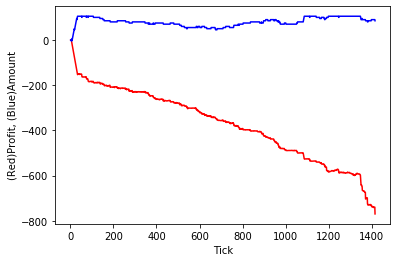

(44) finished after 1476 timesteps, total profit: -754.5403768892221, memery: 1003


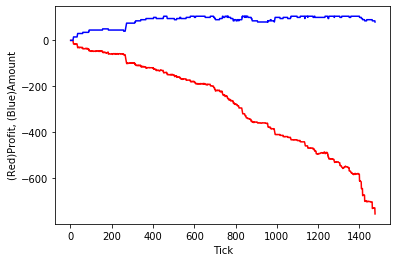

(45) finished after 1536 timesteps, total profit: -751.5660909598904, memery: 1003


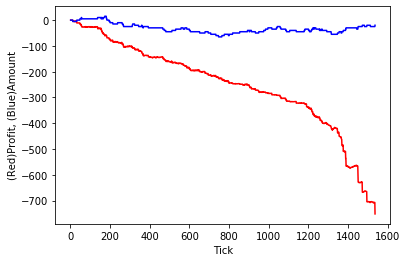

(46) finished after 39702 timesteps, total profit: 104646.00618952469, memery: 2338


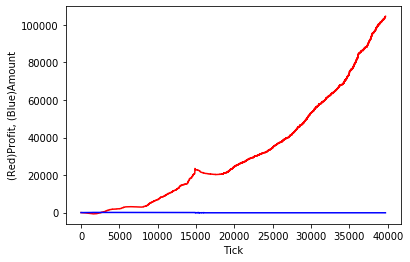

(47) finished after 1877 timesteps, total profit: -778.171587214667, memery: 2351


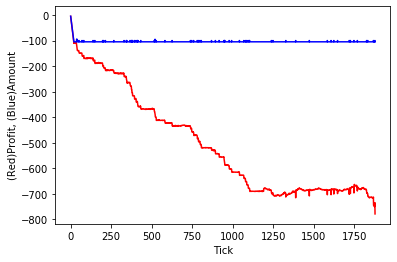

(48) finished after 2109 timesteps, total profit: -750.2712255886267, memery: 2372


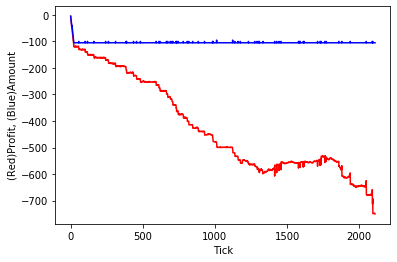

(49) finished after 1068 timesteps, total profit: -758.4838583452629, memery: 2372


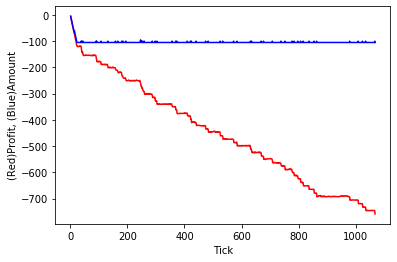

(50) finished after 2062 timesteps, total profit: -775.7103135511735, memery: 2390


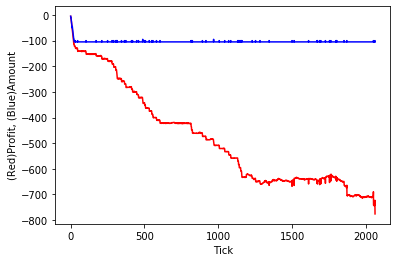

(51) finished after 1953 timesteps, total profit: -751.4233399249987, memery: 2413


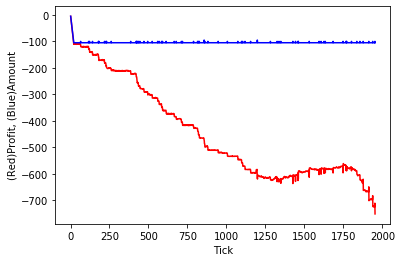

(52) finished after 1877 timesteps, total profit: -769.4195943530121, memery: 2428


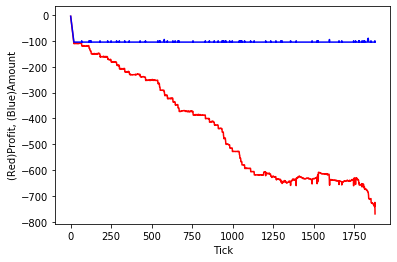

In [ ]:
%matplotlib inline
from trading_gym.env import TradeEnv
from datetime import datetime
import random
import matplotlib
import matplotlib.pylab as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import gym
#matplotlib.use('tkAgg')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device =  torch.device("cpu")

def custom_obs_features_func(history, info):
    list = []
    for i in range(len(history.obs_list)):
        list.append(history.obs_list[i].close)
    
    return list

def custom_reward_func(exchange):
    #info
    '''
    {'index': 56, 'date': '2010-01-01 01:04', 'nav': 50000, 'amount': 250000, 'avg_price': 1.4325899999999998,
    'profit': {'total': -282.0124161115024, 'fixed': -272.23990618194, 'floating': -9.7725099295624},
    'buy_at': 52, 'latest_price': 1.43231}
    
    #print(exchange.info)
    #print('Profit: {} , floating: {} , fixed: {}'.format(exchange.profit, exchange.floating_profit, exchange.fixed_profit))
    
    # profit , index - 50
    if(exchange.floating_profit > 0):
        reward = exchange.floating_profit * (exchange.info["index"] - 50) * 0.001
    else:
        reward = exchange.profit * 0.001
    '''
    if(exchange.floating_profit > 0):
        reward = exchange.floating_profit * (exchange.info["index"] - 50) * 0.001
    else:
        reward = - 0.1
    #reward = exchange.floating_profit * 0.001
    #print(exchange.info["amount"])
    #print(exchange.available_actions)
    #print(reward)
    
    return reward

# Hyper Parameters
BATCH_SIZE = 32
LR = 0.01                   # learning rate
EPSILON = 0.9               # greedy policy
GAMMA = 0.9                 # reward discount
TARGET_REPLACE_ITER = 100   # target update frequency
MEMORY_CAPACITY = 1000
NAV = 5000
env = TradeEnv(data_path='eurusd_patterns_10_test2_slope_trend_pro.lite1-3.csv',
               ops_shape=[],
               get_obs_features_func=custom_obs_features_func,
               get_reward_func=custom_reward_func,
               nav=NAV, 
               data_kwargs={'use_ta': False}
              )

#nv = TradeEnv(data_path='eurusd_patterns_10_test2_slope_trend_pro.lite1-6.csv',ops_shape=[],get_obs_features_func=custom_obs_features_func,nav=1000,get_reward_func=custom_reward_func, data_kwargs={'use_ta': False})
#env = TradeEnv(data_path='eurusd_patterns_10_test2_slope_trend_pro.lite1-6.csv',nav=1000, data_kwargs={'use_ta': False})
env = env.unwrapped
N_ACTIONS = 3
N_STATES = 51
ENV_A_SHAPE = 0
n_episodes = 1000 #10000
PATH = "./training_game_01.h5"


class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(N_STATES, 50).to(device)
        self.fc1.weight.data.normal_(0, 0.1)   # initialization
        self.fc2 = nn.Linear(50, 50).to(device)
        self.fc2.weight.data.normal_(0, 0.1)   # initialization
        self.out = nn.Linear(50, 50).to(device)
        self.out.weight.data.normal_(0, 0.1)   # initialization

    def forward(self, x):
        #print(x)
        #print(x.size())
        x = x.to(device)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        #print(x.size())
        actions_value = self.out(x)
        #print(actions_value)
        #print(actions_value.size())
        return actions_value


class DQN(object):
    def __init__(self):
        self.eval_net, self.target_net = Net().to(device), Net().to(device)

        self.learn_step_counter = 0                                     # for target updating
        self.memory_counter = 0                                         # for storing memory
        self.memory = np.zeros((MEMORY_CAPACITY, N_STATES * 2 + 2))     # initialize memory
        self.optimizer = torch.optim.Adam(self.eval_net.parameters(), lr=LR)
        self.loss_func = nn.MSELoss()

    def choose_action(self, x):
        #print(x)
        x = torch.unsqueeze(torch.FloatTensor(x), 0).to(device)
        # input only one sample
        if np.random.uniform() < EPSILON:   # greedy
            actions_value = self.eval_net.forward(x)
            action = torch.max(actions_value, 1)[1].data.cpu().numpy()
            action = action[0] if ENV_A_SHAPE == 0 else action.reshape(ENV_A_SHAPE)  # return the argmax index
            
        else:   # random
            action = np.random.randint(0, N_ACTIONS)
            action = action if ENV_A_SHAPE == 0 else action.reshape(ENV_A_SHAPE)
            
        return action

    def store_transition(self, s, a, r, s_):
        transition = np.hstack((s, [a, r], s_))
        # replace the old memory with new memory
        index = self.memory_counter % MEMORY_CAPACITY
        self.memory[index, :] = transition
        self.memory_counter += 1

    def learn(self):
        # target parameter update
        if self.learn_step_counter % TARGET_REPLACE_ITER == 0:
            self.target_net.load_state_dict(self.eval_net.state_dict())
        self.learn_step_counter += 1

        # sample batch transitions
        sample_index = np.random.choice(MEMORY_CAPACITY, BATCH_SIZE)
        b_memory = self.memory[sample_index, :]
        b_s = torch.FloatTensor(b_memory[:, :N_STATES]).to(device)
        b_a = torch.LongTensor(b_memory[:, N_STATES:N_STATES+1].astype(int)).to(device)
        b_r = torch.FloatTensor(b_memory[:, N_STATES+1:N_STATES+2]).to(device)
        b_s_ = torch.FloatTensor(b_memory[:, -N_STATES:]).to(device)

        # q_eval w.r.t the action in experience
        q_eval = self.eval_net(b_s).gather(1, b_a)  # shape (batch, 1)
        q_next = self.target_net(b_s_).detach()     # detach from graph, don't backpropagate
        q_target = b_r + GAMMA * q_next.max(1)[0].view(BATCH_SIZE, 1)   # shape (batch, 1)
        loss = self.loss_func(q_eval, q_target)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
    

dqn = DQN()


print('\nCollecting experience...')
for i_episode in range(n_episodes):
    t = 0
    rewards = 0
    profit0 = 0
    obs0 = env.reset()
    x_list, y_list, z_list = [], [], [];
    while True:
        #env.render()
        action = dqn.choose_action(obs0)
        observation, reward, done, info = env.step(action)
        profit = info["profit"]["total"]
        
        #action 0 sell, 1 hold, 2 buy
        #print(info["profit"]["floating"])
        # 儲存 experience
        if((profit - profit0)/NAV > 0.001):
            dqn.store_transition(obs0, action, reward, observation)
        #print((profit-profit0)) 
        
        profit0 = profit
        
        # 累積 reward
        #rewards += reward

        # 有足夠 experience 後進行訓練
        if dqn.memory_counter > MEMORY_CAPACITY:
            dqn.learn()
            #print(dqn.memory_counter)

        # 進入下一 state
        obs0 = observation
        
        
        x_list.append(t+1); y_list.append(info["profit"]["total"]); z_list.append(info["amount"]/1000);
       

        if(done):
            #torch.save(dqn, PATH)
            print('({}) finished after {} timesteps, total profit: {}, memery: {}'.format(i_episode+1, t+1, info["profit"]["total"],dqn.memory_counter))
            if((t+1) > 0):
                plt.cla()
                plt.xlabel('Tick')
                plt.ylabel('(Red)Profit, (Blue)Amount')
                plt.plot(x_list, y_list, 'r')
                plt.plot(x_list, z_list, 'b')
                #plt.figure(tight_layout=True, linewidth=1, edgecolor='r')

                plt.show()
            break

        t += 1

env.close()

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
x_list, y_list, z_list = [], [], [];
x_list.append(1); y_list.append(2); z_list.append(3);
x_list.append(2); y_list.append(4); z_list.append(6);
x_list.append(3); y_list.append(5); z_list.append(3);


plt.cla()
plt.xlabel('Tick')
plt.ylabel('Profit')
plt.plot(x_list, y_list, 'r')
plt.plot(x_list, z_list, 'b')
plt.show()
